Populating the interactive namespace from numpy and matplotlib
adding critical point: vfield (201, 201, 2) (0.01, 0.01) (100, 100)
vf = (201, 201) 0.0 1.41421356237


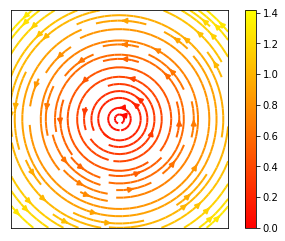

In [1]:
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import utilsdraw, utilsvfield

%pylab inline --no-import-all

# -----------------------------------------------------
# create vector field on regular grid

d = 2

dims = (201, 201)         # Y, X
dx = (0.01, 0.01)         # dy, dx

Y, X = numpy.mgrid[0:dims[0], 0:dims[1]]

vfield = numpy.zeros((dims[0], dims[1], 2))
vfield = utilsvfield.add_criticalPoint2D(vfield, dx, (dims[0]/2, dims[1]/2), 1, 1, 0, 1, 0)

mvf = numpy.linalg.norm(vfield, axis=2)
print 'vf =', mvf.shape, mvf.min(), mvf.max()

#vrng = (0, 7.07106781187)
vrng = (0, mvf.max())

plt.figure()
utilsdraw.draw_slines(X,Y,vfield[:,:,0],vfield[:,:,1],vrng)
plt.xlim([0,dims[1]-1])
plt.ylim([0,dims[0]-1])
plt.show()

PoissonSolver: 2 D grid = (201, 201) with spacings (0.01, 0.01)

Initializing Poisson solver, type = F
  - creating distance kernel: (401, 401) 0.005 2.82843  [[ elapsed time: 0.002 sec. ]]
  - computing the Green's function: (401, 401) -0.843253 0.165477  [[ elapsed time: 0.001 sec. ]]
Poisson solver initialized  [[ elapsed time: 0.003 sec. ]]

 ==> nhhd.decompose (201, 201, 2)
div = (201, 201) 0.0 0.0
curlw = (201, 201) 2.0 2.0

Solving Poisson Eq.
Poisson solver finished  [[ elapsed time: 0.033 sec. ]]
nD = (201, 201) 0.0 0.0

Solving Poisson Eq.
Poisson solver finished  [[ elapsed time: 0.028 sec. ]]
nR = (201, 201) -0.46686040796 0.417258083844
d = (201, 201, 2) 0.0 0.0
r = (201, 201, 2) -1.09522931571 1.09522931571
h = (201, 201, 2) -0.275370041986 0.275370041986


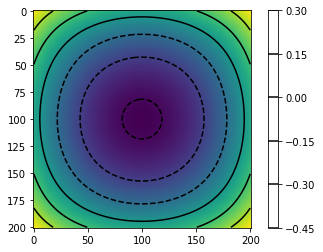

In [2]:
from pynhhd import nHHD

nhhd = nHHD(grid=dims, spacings=dx)
nhhd.decompose(vfield, True)

plt.figure()
plt.imshow(nhhd.nRu)
CS = plt.contour(numpy.arange(0,nhhd.nRu.shape[1]), numpy.arange(0,nhhd.nRu.shape[0]), nhhd.nRu, colors='k')
plt.colorbar()

plt.show()

d = (201, 201) 0.0 0.0
r = (201, 201) 1.68830575362e-14 1.09522931571
h = (201, 201) 1.68830575362e-14 0.389432048047


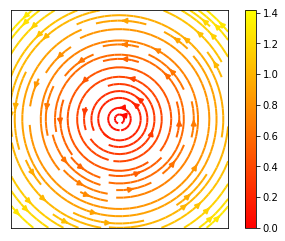

(0, 200)

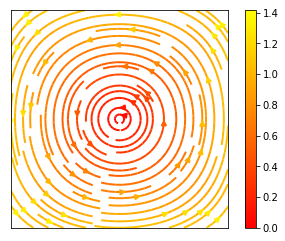

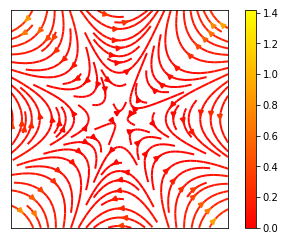

In [4]:
mr = numpy.linalg.norm(nhhd.r, axis=2)
md = numpy.linalg.norm(nhhd.d, axis=2)
mh = numpy.linalg.norm(nhhd.h, axis=2)

print 'd =', md.shape, md.min(), md.max() #, numpy.linalg.norm(md)
print 'r =', mr.shape, mr.min(), mr.max() #, numpy.linalg.norm(mr)
print 'h =', mh.shape, mh.min(), mh.max() #, numpy.linalg.norm(mh)

plt.figure()
utilsdraw.draw_slines(X,Y,vfield[:,:,0],vfield[:,:,1],vrng)
plt.xlim([0,dims[1]-1])
plt.ylim([0,dims[0]-1])
plt.show()

plt.figure()
utilsdraw.draw_slines(X,Y,nhhd.r[:,:,0],nhhd.r[:,:,1],vrng)
plt.xlim([0,dims[1]-1])
plt.ylim([0,dims[0]-1])
#CS = plt.contour(numpy.arange(0,nhhd.nRu.shape[1]), numpy.arange(0,nhhd.nRu.shape[0]), nhhd.nRu, colors='k')

#plt.figure()
#plot_slines(X,Y,nhhd.d,vrng)

plt.figure()
utilsdraw.draw_slines(X,Y,nhhd.h[:,:,0],nhhd.h[:,:,1],vrng)
plt.xlim([0,dims[1]-1])
plt.ylim([0,dims[0]-1])